# credit card transaction fraud

# loading data

In [22]:
import pandas as pd
import os

training_data_path = "fraudTrain.csv"
test_data_path = "fraudTest.csv"

training_data_raw = pd.read_csv(training_data_path)
test_data_raw = pd.read_csv(test_data_path)

In [23]:
training_data_raw

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


# cleaning data

In [24]:
#data cleaning here
training_data_clean = {"cc_num": [], "merchant": [], "category": [], "amt": [], "first": [], "last": [], "gender": [], "lat": [], "long": [], "city_pop": [], "job": [], "unix_time": [], "merch_lat": [], "merch_long": [], "is_fraud": []}
for idx in range(len(training_data_raw["cc_num"])):
    for key in training_data_clean.keys():
        training_data_clean[key].append(training_data_raw[key][idx])
training_data_clean = pd.DataFrame.from_dict(training_data_clean)
training_data_clean.to_csv("credit_card_fraud_clean_train.csv", index=False)

test_data_clean = {"cc_num": [], "merchant": [], "category": [], "amt": [], "first": [], "last": [], "gender": [], "lat": [], "long": [], "city_pop": [], "job": [], "unix_time": [], "merch_lat": [], "merch_long": [], "is_fraud": []}
for idx in range(len(test_data_raw["cc_num"])):
    for key in test_data_clean.keys():
        test_data_clean[key].append(test_data_raw[key][idx])
test_data_clean = pd.DataFrame.from_dict(test_data_clean)
test_data_clean.to_csv("credit_card_fraud_clean_test.csv", index=False)

# Preprocess data for neural network

In [25]:
#Handle subselection of columns for the neural network
#columns to keep: cc_num, merchant, category, amt, lat, long, unix_time, merch_lat, merch_long, is_fraud

#find unique merchants
unique_merchants = set(list(training_data_clean["merchant"]))
for merchant in list(test_data_clean["merchant"]):
    unique_merchants.add(merchant)
unique_merchants = list(unique_merchants)
print(len(unique_merchants))

#create tokenization scheme for merchants
merchant_tokenized_dict = {}
for idx in range(len(unique_merchants)):
    merchant_tokenized_dict[unique_merchants[idx]] = idx

#find unique categories
unique_categories = set(list(training_data_clean["category"]))
for category in list(test_data_clean["category"]):
    unique_categories.add(category)
unique_categories = list(unique_categories)
print(len(unique_categories))

#create tokenization scheme for categories
categories_tokenized_dict = {}
for idx in range(len(unique_categories)):
    categories_tokenized_dict[unique_categories[idx]] = idx

#columns to keep: merchant, category, amt, lat, long, unix_time, merch_lat, merch_long, is_fraud
#create non-categorical data list
non_categorical = []
for idx in range(len(training_data_clean["cc_num"])):
    element = []
    #element.append(training_data_clean["cc_num"][idx])
    element.append(training_data_clean["amt"][idx])
    element.append(training_data_clean["lat"][idx])
    element.append(training_data_clean["long"][idx])
    element.append(training_data_clean["unix_time"][idx])
    element.append(training_data_clean["merch_lat"][idx])
    element.append(training_data_clean["merch_long"][idx])
    non_categorical.append(element)
print("Non-categorical data length:", len(non_categorical))

from keras.utils import to_categorical
#format merchant column as one-hot list
num_unique_merchants = len(unique_merchants)
merchant_categorical = []
for idx in range(len(training_data_clean["merchant"])):
    element_raw = training_data_clean["merchant"][idx]
    element_int = merchant_tokenized_dict[element_raw]
    merchant_categorical.append(to_categorical(element_int, num_classes=num_unique_merchants))
print("Merchant data length:", len(merchant_categorical))

#format category data as one-hot list
num_unique_categories = len(unique_categories)
category_one_hot = []
for idx in range(len(training_data_clean["category"])):
    element_raw = training_data_clean["category"][idx]
    element_int = categories_tokenized_dict[element_raw]
    category_one_hot.append(to_categorical(element_int, num_classes=num_unique_categories))
print("Category length:", len(category_one_hot))

#create is_fraud list as y column
fraud_column = []
num_fraud = 0
for idx in range(len(training_data_clean["is_fraud"])):
    fraud_val = training_data_clean["is_fraud"][idx]
    num_fraud += fraud_val
    fraud_column.append([fraud_val])
print("Fraud length:", len(fraud_column))
print("Number of fraudulent transactions:", num_fraud)

693
14
Non-categorical data length: 1296675
Merchant data length: 1296675
Category length: 1296675
Fraud length: 1296675
Number of fraudulent transactions: 7506


# subsample data

In [5]:
import random
##find all fraud in training data
fraud_data_merchant_sample = []
fraud_data_category_sample = []
fraud_data_non_categorical_sample = []
fraud_data_label_sample = []
for idx in range(len(training_data_clean["is_fraud"])):
    #if the row at idx represents fraud
    if(training_data_clean["is_fraud"][idx] == 1):
        #add data to fraud data samples according to data type
        fraud_data_non_categorical_sample.append(non_categorical[idx])
        fraud_data_category_sample.append(category_one_hot[idx])
        fraud_data_merchant_sample.append(merchant_categorical[idx])
        fraud_data_label_sample.append([1])
##add subsample of non-fraud data with equal number of rows to fraud data in training data
max_index = len(training_data_clean["is_fraud"]) - 1
num_safe_transactions_included = 0
while num_safe_transactions_included < num_fraud:
    #select random row index in the formatted fraud data above
    random_index = random.randint(0, max_index)
    #if this data does not represent a fraudulent transaction
    if(training_data_clean["is_fraud"][random_index] == 0):
        #add the data to fraud_data samples accordingly
        fraud_data_non_categorical_sample.append(non_categorical[random_index])
        fraud_data_category_sample.append(category_one_hot[random_index])
        fraud_data_merchant_sample.append(merchant_categorical[random_index])
        fraud_data_label_sample.append([0])
    num_safe_transactions_included += 1

import numpy as np

fraud_data_non_categorical_sample = np.array(fraud_data_non_categorical_sample)
print("Non-categorical shape:", fraud_data_non_categorical_sample.shape)
fraud_data_merchant_sample = np.array(fraud_data_merchant_sample)
print("Merchant shape:", fraud_data_merchant_sample.shape)
fraud_data_category_sample = np.array(fraud_data_category_sample)
print("Category shape:", fraud_data_category_sample.shape)
fraud_data_label_sample = np.array(fraud_data_label_sample)
print("Label shape:", fraud_data_label_sample.shape)

Non-categorical shape: (14962, 6)
Merchant shape: (14962, 693)
Category shape: (14962, 14)
Label shape: (14962, 1)


# Keras environment setup

In [9]:
#load ML libraries
import hyperopt

from hyperopt import fmin, tpe

from keras.models import Model, load_model
from keras.layers import Dense, Dropout, Input, concatenate

from keras import activations
from keras import callbacks
from keras import regularizers
from keras.utils import plot_model

from sklearn.model_selection import KFold

#define method for generating model
def define_model(num_nodes, dropout, kernel_reg, bias_reg):
    #define input nodes
    input_non_categorical = Input(shape=(6,))
    input_merchant_category = Input(shape=(693,))
    input_purchase_category = Input(shape=(14,))
    #define processing
    concat_input = concatenate(inputs=[input_non_categorical, input_merchant_category, input_purchase_category])
    dense_layer_1 = Dense(num_nodes, activation=activations.relu, kernel_regularizer=regularizers.l2(kernel_reg), bias_regularizer=regularizers.l2(bias_reg))(concat_input)
    dropout_layer_1 = Dropout(dropout)(dense_layer_1)
    #dense_layer_2 = Dense(num_nodes // 2, activation=activations.relu, kernel_regularizer=regularizers.l2(kernel_reg), bias_regularizer=regularizers.l2(bias_reg))(dropout_layer_1)
    #concat_tail = concatenate(inputs=[dropout_layer_1, input_non_categorical, input_purchase_category])
    #dropout_layer_2 = Dropout(dropout / 2)(concat_tail)
    #dense_layer_3 = Dense(num_nodes // 2, activation=activations.relu, kernel_regularizer=regularizers.l2(kernel_reg), bias_regularizer=regularizers.l2(bias_reg))(dropout_layer_2)
    #define output
    #output = Dense(1, activation=activations.sigmoid)(concat_tail)
    output = Dense(1, activation=activations.sigmoid)(dropout_layer_1)
    #compile and return
    network = Model(inputs=[input_non_categorical, input_merchant_category, input_purchase_category], outputs=output)
    #network = Model(inputs=[input_non_categorical, input_purchase_category], outputs=output)
    network.compile(loss="binary_crossentropy")
    return network

# hyperparameter Tuning

In [10]:
#do hyperparameter tuning here
import math
import numpy as np

best_loss = math.inf
best_params = ()

def average(data_list):
    avg = 0
    for idx in range(len(data_list)):
        if not np.isnan(data_list[idx]):
            avg += data_list[idx]
        else:
            avg += 10
    avg /= len(data_list)
    return avg

def get_average_cross_validation_accuracy(args):
    global best_loss, best_params
    max_node_count, dropout, kernel_regularization, bias_regularization = args
    data_split = KFold(n_splits=5, shuffle=True)
    loss_vals = []
    callbacks_list = [callbacks.EarlyStopping(monitor='val_loss', patience=5,), callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=1,)]
    for train_index, test_index in data_split.split(fraud_data_non_categorical_sample, fraud_data_label_sample):
        #convert data into train and test data
        non_categorical_train, non_categorical_test = fraud_data_non_categorical_sample[train_index], fraud_data_non_categorical_sample[test_index]
        merchant_cat_train, merchant_cat_test = fraud_data_merchant_sample[train_index], fraud_data_merchant_sample[test_index]
        purchase_cat_train, purchase_cat_test = fraud_data_category_sample[train_index], fraud_data_category_sample[test_index]
        label_train, label_test = fraud_data_label_sample[train_index], fraud_data_label_sample[test_index]
        network = define_model(max_node_count, dropout, kernel_regularization, bias_regularization)
        network.fit(x=[non_categorical_train, merchant_cat_train, purchase_cat_train], y=label_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=callbacks_list, verbose=0)
        evaluation = network.evaluate(x=[non_categorical_test, merchant_cat_test, purchase_cat_test], y=label_test, verbose=0)
        #network.fit(x=[non_categorical_train, purchase_cat_train], y=label_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=callbacks_list, verbose=0)
        #evaluation = network.evaluate(x=[non_categorical_test, purchase_cat_test], y=label_test, verbose=0)
        loss_vals.append(evaluation)
        del network
        del non_categorical_train, non_categorical_test
        del merchant_cat_train, merchant_cat_test
        del label_train, label_test
    average_loss = average(loss_vals)
    if average_loss < best_loss:
        best_params = args
        best_loss = average_loss
    return average_loss

def optimize_hyperparameters():
    max_node_counts = [32, 64, 128, 256, 512]
    dropout_values = [0.2, 0.3, 0.4, 0.5, 0.6]
    kernel_reg_list = [0.01, 0.025, 0.05]
    bias_reg_list = [0.01, 0.025, 0.05]
    case_list = []
    for max_node_count in max_node_counts:
        for dropout_value in dropout_values:
            for kernel_reg in kernel_reg_list:
                for bias_reg in bias_reg_list:
                    case_list.append((max_node_count, dropout_value, kernel_reg, bias_reg))
    feature_space = hyperopt.hp.choice('a', case_list)
    fmin(get_average_cross_validation_accuracy, feature_space, algo=tpe.suggest, max_evals=128)

optimize_hyperparameters()
print("Best parameters:", best_params)
print("Best loss:", best_loss)

100%|██████████| 128/128 [23:11<00:00, 10.87s/trial, best loss: 0.685332453250885]
Best parameters: (32, 0.2, 0.025, 0.025)
Best loss: 0.685332453250885


# Train Neural Network

In [31]:
#Train neural network here
import os
#os.mkdir("cc_fraud_detector")

callbacks_list = [callbacks.EarlyStopping(monitor='val_loss', patience=5,)]
try:
    max_node_count, dropout_value, kernel_reg, bias_reg = best_params
except:
    max_node_count, dropout_value, kernel_reg, bias_reg = 32, 0.2, 0.025, 0.025

network = define_model(max_node_count, dropout_value, kernel_reg, bias_reg)
history = network.fit(x=[fraud_data_non_categorical_sample, fraud_data_merchant_sample, fraud_data_category_sample], y=fraud_data_label_sample, epochs=20, batch_size=128, validation_split=0.2, callbacks=callbacks_list)
#history = network.fit(x=[fraud_data_non_categorical_sample, fraud_data_category_sample], y=fraud_data_label_sample, epochs=20, batch_size=128, validation_split=0.2, callbacks=callbacks_list)
plot_model(network, to_file='cc_fraud_detector.png', show_shapes=True)

Train on 11976 samples, validate on 2994 samples
Epoch 1/20
11976/11976 [==============================] - 1s 107us/step - loss: 6999204.8599 - val_loss: 2048748.4890
Epoch 2/20
11976/11976 [==============================] - 0s 35us/step - loss: 1249072.1383 - val_loss: 0.0266
Epoch 3/20
11976/11976 [==============================] - 0s 36us/step - loss: 29302.3100 - val_loss: 0.0229
Epoch 4/20
11976/11976 [==============================] - 0s 36us/step - loss: 2000.6421 - val_loss: 1876.2998
Epoch 5/20
11976/11976 [==============================] - 0s 35us/step - loss: 1398.7321 - val_loss: 3353.5233
Epoch 6/20
11976/11976 [==============================] - 0s 36us/step - loss: 820.8241 - val_loss: 0.0207
Epoch 7/20
11976/11976 [==============================] - 0s 36us/step - loss: 786.7415 - val_loss: 0.0204
Epoch 8/20
11976/11976 [==============================] - 0s 36us/step - loss: 954.4176 - val_loss: 4143.0151
Epoch 9/20
11976/11976 [==============================] - 0s 35us/s

# False positive and negative rates

In [23]:
#make predictions based on ALL data rows (1296675 rows)
prediction = network.predict([non_categorical, merchant_categorical, category_one_hot], batch_size=128, verbose=1, use_multiprocessing=True)
prediction = prediction.reshape((1296675))
prediction = prediction.tolist()
truth_values = np.array(training_data_clean["is_fraud"]).reshape((1296675))
truth_values = truth_values.tolist()
#create counts for false pos, false negative, true pos, and true negative
false_pos_count = 0
false_negative_count = 0
true_pos_count = 0
true_negative_count = 0
#for each prediction
for idx in range(1296675):
    #compare each prediction to the true value
    #increment appropriate count
    if(abs(prediction[idx] - truth_values[idx]) < 0.5):
        if(int(truth_values[idx]) == 0):
            true_negative_count += 1
        else:
            true_pos_count += 1
    else:
        if(int(truth_values[idx]) == 0):
            false_pos_count += 1
        else:
            false_negative_count += 1
#output
print("True positives:", true_pos_count)
print("True negatives:", true_negative_count)
print("False positives:", false_pos_count)
print("False negatives:", false_negative_count)

1296675/1296675 [==============================] - 8s 6us/step
True positives: 7506
True negatives: 0
False positives: 1289169
False negatives: 0


# Evaluate on test set

In [29]:
#evaluate
print(network.evaluate([non_categorical, merchant_categorical, category_one_hot], np.array(training_data_clean["is_fraud"]), verbose=0))
print(history.history)

1.0415509112926966
{'val_loss': [986944.9451402805, 20466.413291426605, 0.017238952219486237, 15944.724000735847, 0.01613517850637436, 13362.053722027387, 294.20599477356404, 0.015318620949983597, 2466.092094997286, 3440.411817123831, 0.014605141244828701, 0.014344729483127594, 185.6782540096469, 27.894352156716185, 1.435651861673685, 1.3124525739737327, 1.0449346056283915], 'loss': [7020387.8559619235, 304408.5956783358, 11525.634831348896, 5185.692391129916, 2840.280045523991, 1876.2393422913535, 1310.6587496281625, 1702.8371943268046, 1101.9295978839189, 932.8935347093927, 410.93460947366736, 189.7249097906914, 71.31185670494635, 42.09237258818123, 1.5221927117807672, 0.7182963884665159, 0.746050506571411]}


# Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fraud_data_non_categorical_sample_train, fraud_data_non_categorical_sample_test, fraud_data_merchant_sample_train, \
fraud_data_merchant_sample_test, fraud_data_category_sample_train, fraud_data_category_sample_test, \
fraud_data_label_sample_train, fraud_data_label_sample_test = train_test_split(fraud_data_non_categorical_sample, fraud_data_merchant_sample, fraud_data_category_sample, fraud_data_label_sample, test_size=0.2, random_state=1)

# Combine the subsampled Transactional and Non-Transactional data into one array of data
comb_train_sub = np.hstack((fraud_data_non_categorical_sample_train, fraud_data_merchant_sample_train, fraud_data_category_sample_train))
comb_test_sub = np.hstack((fraud_data_non_categorical_sample_test, fraud_data_merchant_sample_test, fraud_data_category_sample_test))

# Random Forest of subsampled data
RFC = RandomForestClassifier()
RFC.fit(comb_train_sub,fraud_data_label_sample_train)

/Users/Jerome/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


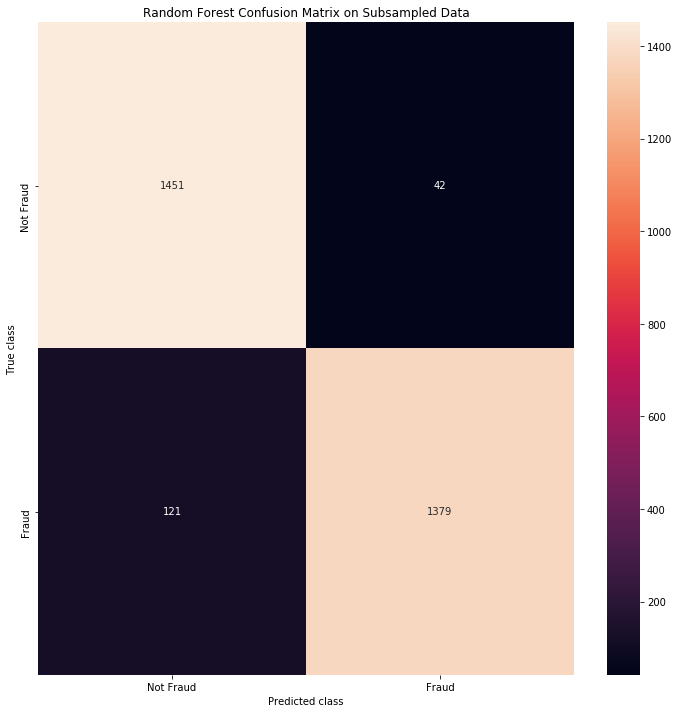

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1493
           1       0.97      0.92      0.94      1500

    accuracy                           0.95      2993
   macro avg       0.95      0.95      0.95      2993
weighted avg       0.95      0.95      0.95      2993



<Figure size 648x504 with 0 Axes>

In [15]:
y_pred = RFC.predict(comb_test_sub)

# Random Forest trained and tested on subsampled data
LABELS = ['Not Fraud', 'Fraud']
conf_matrix = confusion_matrix(fraud_data_label_sample_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Random Forest Confusion Matrix on Subsampled Data")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
plt.figure(figsize=(9, 7))

print(classification_report(fraud_data_label_sample_test, y_pred))

In [26]:
non_categorical_test = []
for idx in range(len(test_data_clean["cc_num"])):
    element = []
    #element.append(test_data_clean["cc_num"][idx])
    element.append(test_data_clean["amt"][idx])
    element.append(test_data_clean["lat"][idx])
    element.append(test_data_clean["long"][idx])
    element.append(test_data_clean["unix_time"][idx])
    element.append(test_data_clean["merch_lat"][idx])
    element.append(test_data_clean["merch_long"][idx])
    non_categorical_test.append(element)
print("Non-categorical data length:", len(non_categorical_test))

from keras.utils import to_categorical
#format merchant column as one-hot list
num_unique_merchants = len(unique_merchants)
merchant_categorical_test = []
for idx in range(len(test_data_clean["merchant"])):
    element_raw = test_data_clean["merchant"][idx]
    element_int = merchant_tokenized_dict[element_raw]
    merchant_categorical_test.append(to_categorical(element_int, num_classes=num_unique_merchants))
print("Merchant data length:", len(merchant_categorical_test))

#format category data as one-hot list
num_unique_categories = len(unique_categories)
category_one_hot_test = []
for idx in range(len(test_data_clean["category"])):
    element_raw = test_data_clean["category"][idx]
    element_int = categories_tokenized_dict[element_raw]
    category_one_hot_test.append(to_categorical(element_int, num_classes=num_unique_categories))
print("Category length:", len(category_one_hot_test))

fraud_data_label = np.array(training_data_clean['is_fraud']).reshape(-1, 1)
fraud_data_label_test = np.array(test_data_clean['is_fraud']).reshape(-1, 1)

Non-categorical data length: 555719
Merchant data length: 555719
Category length: 555719


In [36]:
# Combine the subsampled Transactional and Non-Transactional data into one array of data
comb_train = np.hstack((non_categorical, merchant_categorical, category_one_hot))
comb_test = np.hstack((non_categorical_test, merchant_categorical_test, category_one_hot_test))

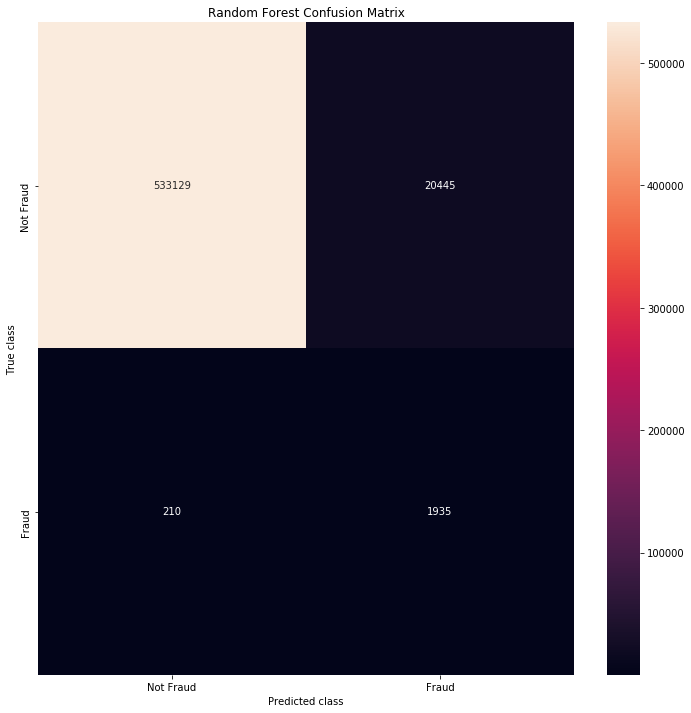

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.09      0.90      0.16      2145

    accuracy                           0.96    555719
   macro avg       0.54      0.93      0.57    555719
weighted avg       1.00      0.96      0.98    555719



<Figure size 648x504 with 0 Axes>

In [37]:
# Random Forest trained on subsampled data, tested on full test set
y_pred = RFC.predict(comb_test)

LABELS = ['Not Fraud', 'Fraud']
conf_matrix = confusion_matrix(fraud_data_label_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Random Forest Confusion Matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
plt.figure(figsize=(9, 7))

print(classification_report(fraud_data_label_test, y_pred))

# SMOTE

In [41]:
from imblearn.over_sampling import SMOTE 

smote = SMOTE(random_state=1)
comb_data_smote, fraud_truth_value_smote = smote.fit_resample(comb_train, fraud_data_label)

In [42]:
RFC = RandomForestClassifier()
RFC.fit(comb_data_smote, fraud_truth_value_smote)

RandomForestClassifier()

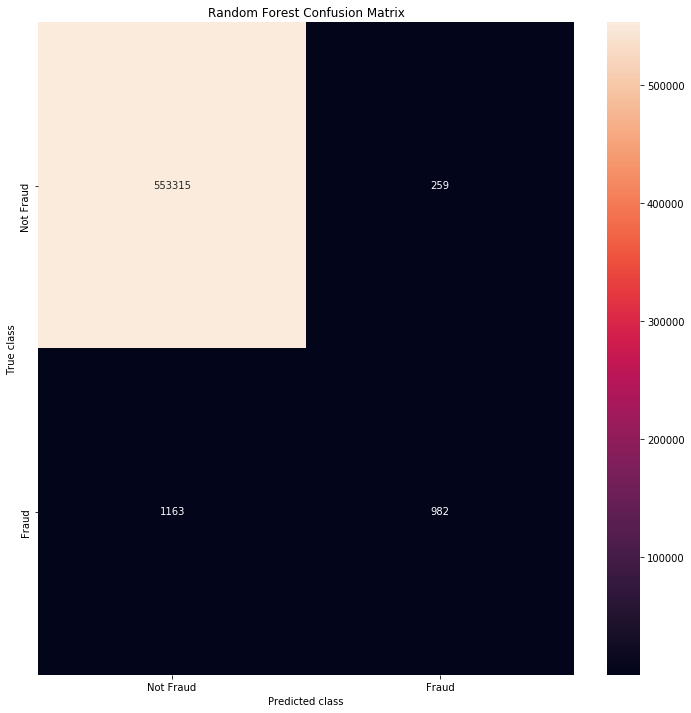

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.79      0.46      0.58      2145

    accuracy                           1.00    555719
   macro avg       0.89      0.73      0.79    555719
weighted avg       1.00      1.00      1.00    555719



<Figure size 648x504 with 0 Axes>

In [44]:
# Random Forest trained on smote data, tested on full test set
y_pred = RFC.predict(comb_test)

LABELS = ['Not Fraud', 'Fraud']
conf_matrix = confusion_matrix(fraud_data_label_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Random Forest Confusion Matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
plt.figure(figsize=(9, 7))

print(classification_report(fraud_data_label_test, y_pred))